In [23]:
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
import matplotlib.pyplot as plt 


In [9]:
with open('stocks.txt', 'r') as file:
    text = file.readlines()
    
portfolio = {}
for line in text:
    ticker, value = line.split('-')
    ticker = f'{ticker.strip()}.SA'
    value = float(value.strip())
    print(value, ticker)
    portfolio[ticker] = value
print(portfolio)
    

100.0 WEGE3.SA
100.0 ITUB4.SA
100.0 PETR4.SA
100.0 CMIG4.SA
100.0 KLBN4.SA
{'WEGE3.SA': 100.0, 'ITUB4.SA': 100.0, 'PETR4.SA': 100.0, 'CMIG4.SA': 100.0, 'KLBN4.SA': 100.0}


[*********************100%***********************]  6 of 6 completed


Ticker,CMIG4.SA,ITUB4.SA,KLBN4.SA,PETR4.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-01-02,2.534566,11.692113,1.518270,2.779415,4.988704,48512.0
2015-01-05,2.469221,11.750875,1.490963,2.541857,5.022719,47517.0
2015-01-06,2.447440,11.940964,1.512808,2.458713,4.948214,48001.0
2015-01-07,2.447440,12.372974,1.551039,2.574521,4.891521,49463.0
2015-01-08,2.427639,12.566521,1.534654,2.740811,4.974128,49943.0
...,...,...,...,...,...,...
2024-12-20,11.336431,31.481909,4.590000,35.522152,55.460236,122102.0
2024-12-23,10.904193,30.872257,4.560000,35.531796,54.240002,120767.0
2024-12-26,11.050000,31.072144,4.590000,35.770000,54.660000,121078.0


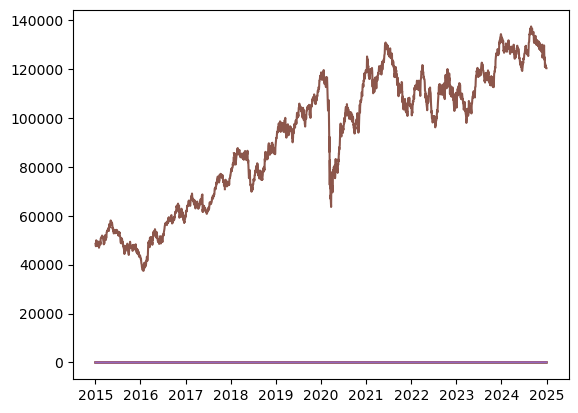

In [24]:
stock = 'ITUB4.SA'
actives = list(portfolio.keys())
actives.append('^BVSP')
start='2015-01-01'
end='2025-01-01'
price_table = yf.download(actives, start=start, end=end)
price_table = price_table['Close']
display(price_table)
plt.plot(price_table)

In [19]:
profits = {}
for active in price_table.columns:
    profit = price_table[active][-1] / price_table[active][0]
    profits[active] = profit
print(profits)    

{'CMIG4.SA': 4.383393442036961, 'ITUB4.SA': 2.6267578102537597, 'KLBN4.SA': 3.0231782396120654, 'PETR4.SA': 13.020725595273378, 'WEGE3.SA': 10.577898255316587, '^BVSP': 2.479448383905013}


In [27]:
initial_value = sum(portfolio.values())
print(f'Valor inicial da carteira: {initial_value}')
final_value = sum(portfolio[active] * profits[active] for active in portfolio)
print(f'Valor final da carteira: {final_value}')
profits[active]
portfolio_profit = final_value / initial_value -1
print(f'Rentabilidade da carteira: {portfolio_profit: .1%}')
profit_index = profits['^BVSP'] - 1
print(f'Rentabilidade do índice Ibovespa: {profit_index: .1%}') 


Valor inicial da carteira: 500.0
Valor final da carteira: 3363.1953342492748
Rentabilidade da carteira:  572.6%
Rentabilidade do índice Ibovespa:  147.9%
